## Escuela de verano RIIAA
### CNN para la detección de neumonía

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


In [ ]:
# Accediendo a Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Copiamos los archivos de Drive al entorno de Colab
!cp "____" "Neumonia_Dataset.zip"
!unzip -uq "Neumonia_Dataset.zip"

In [ ]:
# Bibliotecas a emplear
import os
import cv2
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from ____ import ____
from ____ import ____
import matplotlib.pyplot as plt

In [ ]:
# Definir las rutas donde estan las imagenes
train_folder= '/content/Neumonia_Dataset/train'
val_folder = '/content/Neumonia_Dataset/val'
test_folder = '/content/Neumonia_Dataset/test'

In [ ]:
# Se toman 4 imagenes de forma aleatoria
os.listdir(train_folder)
train_sanas = ____+'/NORMAL/'
train_neum = ____+'/PNEUMONIA/'
img_sanas = []
img_neumonia = []
for i in ____(4):
    num_alea = np.random.randint(len(os.listdir(train_sanas)))
    img_sanas.append(train_sanas + os.listdir(train_sanas)[num_alea])
    img_neumonia.append(train_neum + os.listdir(train_neum)[num_alea])

In [ ]:
# Se muestran radiografías de personas con y sin neumonía
print('Primer fila: personas sin neumonía')
print('Segunda fila: personas con neumonía')
plt.rcParams['figure.dpi'] = 150
for num_imagen in ____(8):
    if num_imagen<4:
        imagen = cv2.imread(img_sanas[num_imagen])
    else:
        imagen = cv2.imread(img_neumonia[num_imagen-4])
    plt.subplot(2,4,num_imagen+1)
    plt.imshow(____)
    plt.axis('off')
plt.show()

In [ ]:
# Red neuronal convolucional
cnn = models.Sequential()

# Capas convolucionales y de pooling
cnn.add(layers.____(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.____(pool_size = (2, 2)))
cnn.add(layers.____(32, (3, 3), activation="relu"))
cnn.add(layers.____(pool_size = (2, 2)))
cnn.add(layers.____(32, (3, 3), activation="relu"))
cnn.add(layers.____(pool_size = (2, 2)))
cnn.add(layers.____())

# Capas densamente conectadas
cnn.add(layers.____(activation = 'relu', units = 128))
cnn.add(layers.____(activation = 'sigmoid', units = 1))

# Compilar el modelo neuronal
cnn.____(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Detalle de la red neuronal convolucional
cnn.____()

In [ ]:
# Preprocesamiento de las imagenes
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Normalización de imagenes
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generación de los conjuntos de entrenamiento, validación y prrueba
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (150, 150),
                                                 batch_size = ____,
                                                 class_mode = '____')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size =(150, 150),
                                                        batch_size = ____,
                                                        class_mode = '____')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = ____,
                                            class_mode = '____')

In [ ]:
cnn_model = cnn.____(training_set,
                    steps_per_epoch=____,
                    epochs=____,
                    validation_data=validation_generator,
                    validation_steps=____)

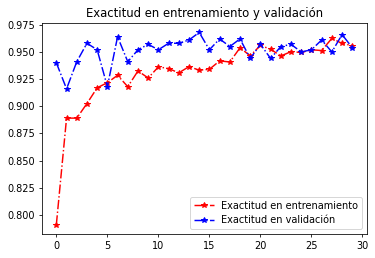

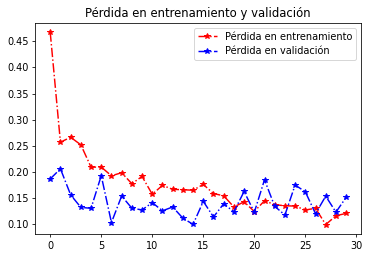

In [ ]:
# Graficas de la presición y función de perdida

acc = cnn_model.____['accuracy']
val_acc = cnn_model.____['val_accuracy']
loss = cnn_model.____['loss']
val_loss = cnn_model.____['val_loss']

epochs = range(len(acc))

plt.rcParams['figure.dpi'] = 70
plt.plot(____, ____, '-.r*', label='Exactitud en entrenamiento')
plt.plot(____, ____, '-.b*', label='Exactitud en validación')
plt.title('Exactitud en entrenamiento y validación')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-.r*', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, '-.b*', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
test_accu = cnn.____(test_set,steps=50)

50/50 [==============================] - 9s 186ms/step - loss: 0.3447 - accuracy: 0.9090


In [ ]:
print('La exactitud en el conjunto de prueba es: ',test_accu[1]*100, '%')

La exactitud en el conjunto de prueba es:  90.89999794960022 %


Persona con neumonia


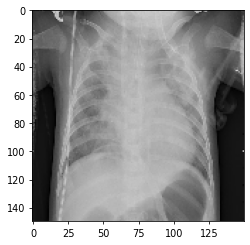

In [ ]:
# Predicción sobre una imagen de prueba

#img_ori = cv2.imread('/content/Neumonia_Dataset/test/NORMAL/IM-0011-0001-0002.jpeg')
img_ori = cv2.imread('/content/Neumonia_Dataset/test/PNEUMONIA/person119_bacteria_566.jpeg')

img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.____(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
imagen_a_probar = np.____(img,(1,150, 150, 3))
predictions = cnn.____(imagen_a_probar)
if(predictions == 0):
  print('Persona sin neumonia')
else:
  print('Persona con neumonia')
plt.imshow(img)
plt.show()